#**OPTIMIZING BANK MARKETING STRATEGIES**

In this code, we will walk through a comprehensive data analysis and modeling project using Python. This project involves data preprocessing, exploratory data analysis (EDA), visualization, and building a logistic regression model to predict.

<br>

##**BUSINESS STUDY**

In a competitive banking landscape, effective marketing significantly impacts revenue, especially through term deposits. The challenge is optimizing telephonic campaigns, which are potent but costly. This project uses predictive modeling with data from a Portuguese bank's marketing campaign to identify high-probability prospects, reducing costs and enhancing efficiency. Combining exploratory data analysis and predictive modeling, we aimed to understand customer behavior and develop robust models. Analyzing datasets from telephonic campaigns (May 2008 - November 2010), we explored customer interactions and responses. This report details our methodologies, findings, and models, providing actionable insights for banks to optimize marketing and boost term deposit subscriptions.

<br>

##**DATASET USED**
The data is from the direct marketing campaigns of a Portuguese banking institution (S. Moro et al, 2014). The marketing campaigns were telephonic in nature. The prospective customers were often contacted more than once to assess if the customer would subscribe to the term deposit or not. The data folder has two datasets:

###**train.csv:**
45,211 rows and 17 columns ordered by date (from May 2008 to November 2010)

###**test.csv:**
4521 rows and 17 columns with 10% of the examples (4521), randomly selected from train.csv

<br>

##**Importing Libraries**
First, we need to import the necessary libraries for our analysis and modeling.

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from collections import Counter
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import svm

##**Loading the Dataset**

We start by loading the dataset into a Pandas DataFrame.

In [54]:
data = pd.read_csv(r'/Analysis 1.csv', sep=',')
data.head()


,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


##**Understanding the Data**

First, we take a quick look at its structure. The dataset comprises various columns, including customer age, job type, education, balance, and whether they subscribed to the service (y).



In [55]:
print("Shape of the data:", data.shape)
print("Columns in the dataset:", data.columns)


Shape of the data: (49732, 18)
Columns in the dataset: Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')


##**Exploratory Data Analysis (EDA)**

###**Distribution of Age**
We'll create age groups to see how calls are distributed across different age ranges.








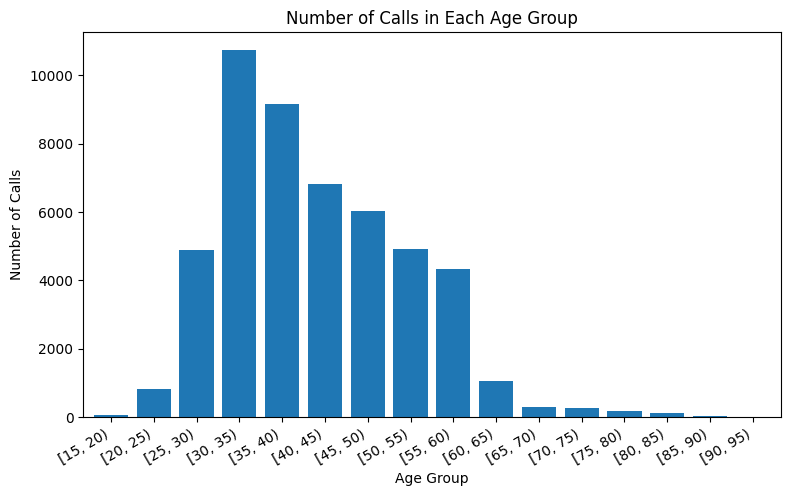

In [56]:
bins = list(range(15, 100, 5))
data['age_group'] = pd.cut(data['age'], bins=bins, right=False, include_lowest=True)
age_group_counts = data['age_group'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(9, 5))
age_group_counts.plot(kind='bar', width=0.8)
plt.xlabel('Age Group')
plt.ylabel('Number of Calls')
plt.title('Number of Calls in Each Age Group')
plt.xticks(rotation=30, ha='right')
plt.show()


###**Conversion Rates by Age Group**
We focus on data where the outcome is 'yes' and analyze conversion rates by age group.



<ipython-input-57-c6b65127cb39>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_age['age_group'] = pd.cut(data_age['age'], bins=bins, right=False, include_lowest=True)


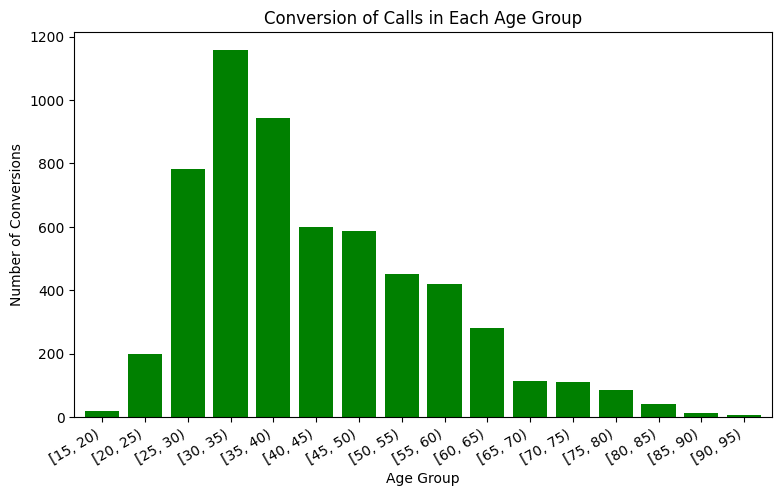

In [57]:
data_age = data[data['y'] == 'yes']
bins = list(range(15, 100, 5))
data_age['age_group'] = pd.cut(data_age['age'], bins=bins, right=False, include_lowest=True)
age_group_counts = data_age['age_group'].value_counts().sort_index()

plt.figure(figsize=(9, 5))
age_group_counts.plot(kind='bar', width=0.8, color='g')
plt.xlabel('Age Group')
plt.ylabel('Number of Conversions')
plt.title('Conversion of Calls in Each Age Group')
plt.xticks(rotation=30, ha='right')
plt.show()


###**Job Analysis**
Next, we analyze the distribution of calls made to different job holders and visualize the results.

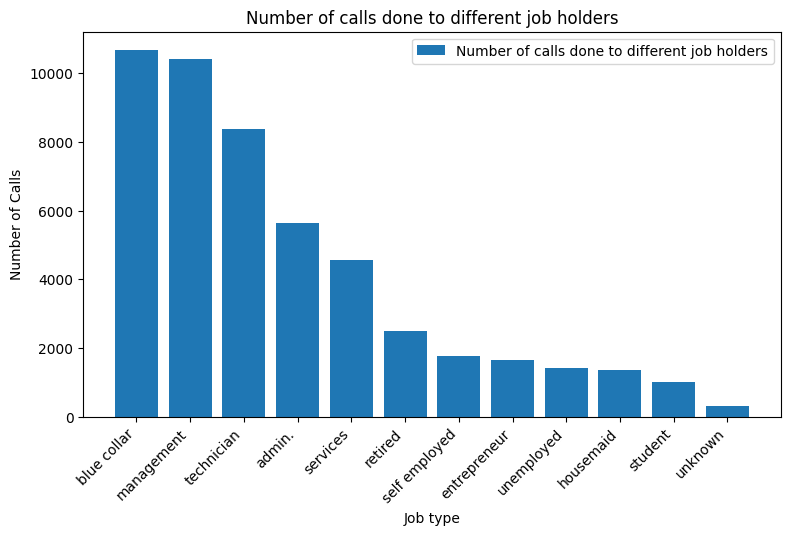

In [58]:
job_graph = data['job'].value_counts().to_frame().reset_index()

plt.figure(figsize=(9, 5))
plt.bar(job_graph['job'], job_graph['count'], label='Number of calls done to different job holders')
plt.xlabel('Job type')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Calls')
plt.title('Number of calls done to different job holders')
plt.legend()
plt.show()


###**Conversion Rates by Job**
We also look at the conversion rates among different job holders.

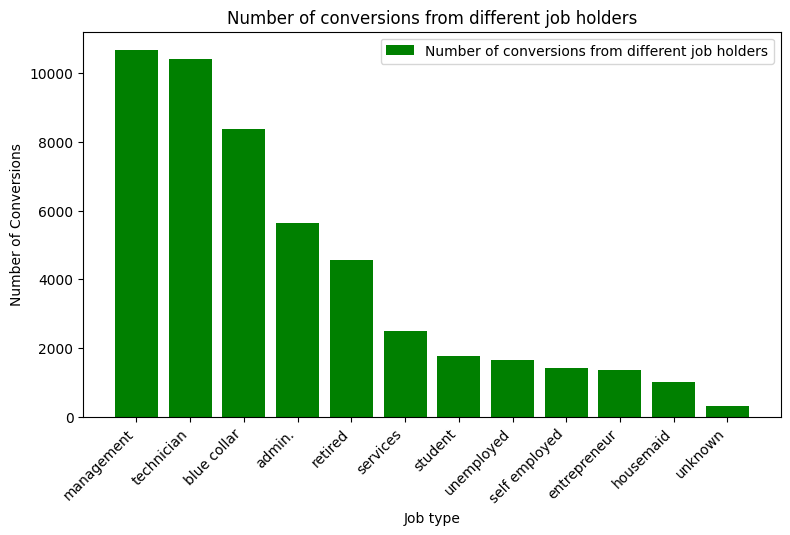

In [59]:
dj = data[data['y'] == 'yes']
job_graph_yes = dj['job'].value_counts().to_frame().reset_index()

plt.figure(figsize=(9, 5))
plt.bar(job_graph_yes['job'], job_graph['count'], label='Number of conversions from different job holders', color='g')
plt.xlabel('Job type')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Conversions')
plt.title('Number of conversions from different job holders')
plt.legend()
plt.show()


###**Education Analysis**
We analyze and visualize the distribution and conversion rates by education level.

<Figure size 900x500 with 0 Axes>

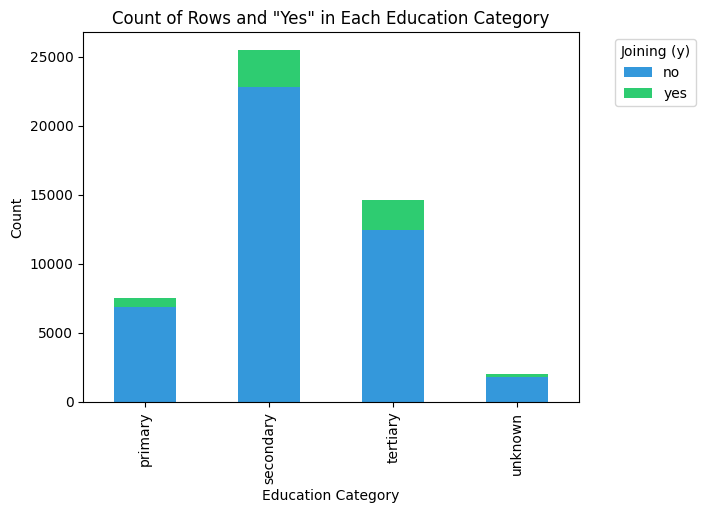

In [60]:
count_df = data.groupby(['education', 'y']).size().unstack().fillna(0)

plt.figure(figsize=(9, 5))
count_df.plot(kind='bar', stacked=True, color=['#3498db', '#2ecc71'])
plt.xlabel('Education Category')
plt.ylabel('Count')
plt.title('Count of Rows and "Yes" in Each Education Category')
plt.legend(title='Joining (y)', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


##**Building a Logistic Regression Model**
Next, we build a logistic regression model to predict the outcomes.

<br>

###**Data Preprocessing**
We preprocess the data by one-hot encoding categorical variables and splitting the data into training and testing sets.

In [106]:
data = pd.read_csv(r'/Analysis 1.csv', sep=',')
X = data.drop(columns=['y'])
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

# List of categorical columns to one-hot encode
onehot = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month','day','poutcome']

def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, axis=1)
        df = pd.concat([df, dummies], axis=1)
    return df

X_train_one = dummy_df(X_train, onehot)
print(X_train_one.shape)
X_test_one = dummy_df(X_test, onehot)
print(X_test_one.shape)




Number transactions X_train dataset:  (39785, 17)
Number transactions y_train dataset:  (39785,)
Number transactions X_test dataset:  (9947, 17)
Number transactions y_test dataset:  (9947,)
(39785, 82)
(9947, 82)


###**Training the Model  (Logistic Regression)**
We train a logistic regression model on the preprocessed data.
In the context of predicting whether a customer will purchase the term deposit product offered by the bank, logistic regression emerges as a compelling choice for its suitability to binary classification tasks.

Logistic regression is one of the methods that are well-suited for cases where the target variable is categorical and binary as in this case, "yes" or "no" to subscribing term insurance.

In [107]:
clf = LogisticRegression()
clf.fit(X_train_one, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

###**Evaluating the Model**
We evaluate the model using accuracy, confusion matrix, and classification report.

0.8820749974866794
[[8543  207]
 [ 966  231]]
              precision    recall  f1-score   support

          no       0.90      0.98      0.94      8750
         yes       0.53      0.19      0.28      1197

    accuracy                           0.88      9947
   macro avg       0.71      0.58      0.61      9947
weighted avg       0.85      0.88      0.86      9947



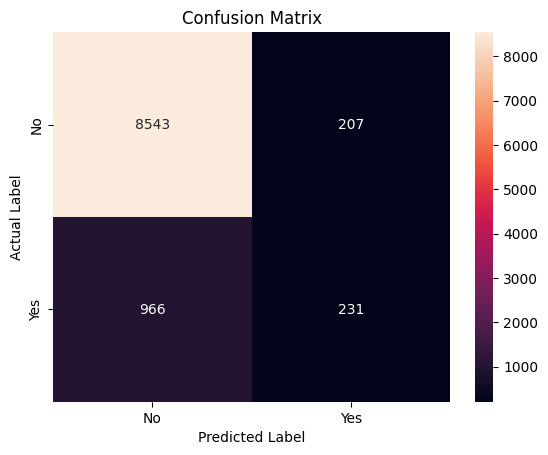

In [108]:
y_pred = clf.predict(X_test_one)
print(metrics.accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

sns.heatmap(pd.DataFrame(cm, index=["No", "Yes"], columns=["No", "Yes"]), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


## **Reading the Logistic Regression Model Metrics**
The output of our model shows that it performs well in predicting when customers will not subscribe to term insurance ("No"), with good recall scores. However, its performance in predicting when customers will subscribe ("Yes") is notably lower. This discrepancy arises because our dataset has relatively few instances where customers actually subscribed to term insurance, this is also called imbalance in the data. As a result, the model hasn't had enough examples to learn effectively about the patterns and characteristics associated with subscription behavior.

To address this issue, we can use a synthetic data generation technique. This involves creating additional rows of data that simulate scenarios where customers do subscribe to term insurance. By synthetically augmenting our dataset with these simulated instances, we can provide more examples for the model to learn from. This approach helps to balance the representation of different outcomes (subscription and non-subscription) in our data, potentially improving the model's ability to accurately predict when customers will subscribe to term insurance. For this, we will utilize SMOTE(Synthetic Minority Over-sampling Technique).


And after that we will run the Logistic Regression model again to see the changes.

After SMOTE - X_train_smote shape: (70344, 82)
After SMOTE - y_train_smote shape: (70344,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score:
0.7895847994370162
[[6981 1769]
 [ 324  873]]
              precision    recall  f1-score   support

          no       0.96      0.80      0.87      8750
         yes       0.33      0.73      0.45      1197

    accuracy                           0.79      9947
   macro avg       0.64      0.76      0.66      9947
weighted avg       0.88      0.79      0.82      9947



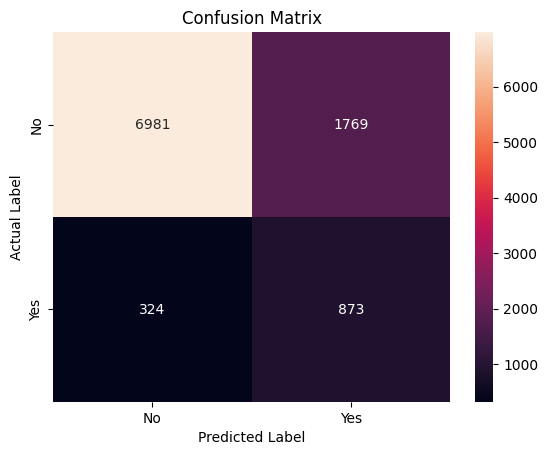

In [113]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train_one, y_train)
print("After SMOTE - X_train_smote shape:", X_train_smote.shape)
print("After SMOTE - y_train_smote shape:", y_train_smote.shape)

# # Loading the regression model
clf.fit(X_train_smote, y_train_smote)

y_pred = clf.predict(X_test_one)

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

sns.heatmap(pd.DataFrame(cm, index=["No", "Yes"], columns=["No", "Yes"]), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


##**Results Explanation and Conclusion**
###**Accuracy and Confusion Matrix**
The logistic regression model achieved an accuracy score of 0.7896, indicating that it correctly predicted the outcome for approximately 79% of the cases in the dataset. The confusion matrix provides further insights into the model's performance:

True Positives (TP): 873

True Negatives (TN): 6981

False Positives (FP): 1769

False Negatives (FN): 324

<br>

###**Recall**
**Recall (for "yes" class):** Recall measures the proportion of actual positives that were correctly identified by the model. In this case, the model correctly identified 73% of the customers who actually took term insurance.

**Recall (for "no" class):** Recall measures the proportion of actual negatives that were correctly identified by the model. In this case, the model correctly identified 80% of the customers who actually did not take the term insurance.

###**F1-Score**
The F1-score, which is the harmonic mean of precision and recall, for the "yes" class is 0.45. This metric provides a balance between precision and recall, indicating moderate performance in correctly identifying customers who take term insurance.

##**Interpretation**
The high accuracy suggests that the model performs reasonably well overall in predicting both classes.

The precision and recall for the "yes" class (customers who took term insurance) highlight a trade-off: while the model correctly identifies a significant portion of these customers (high recall), the precision indicates that the predictions are not as precise or specific.

##**Conclusion**
In conclusion, the logistic regression model shows promise in predicting whether a customer will take term insurance. However, there is room for improvement, especially in increasing the precision for positive predictions. This would involve further fine-tuning the model or exploring different algorithms to better balance between identifying true positives and reducing false positives.

These results provide valuable insights into customer behavior towards term insurance and can be leveraged to optimize marketing strategies or tailor offerings more effectively.





